<a href="https://www.kaggle.com/code/tayqiming1181103290/time-series-forecasting-with-machine-learning-yt?scriptVersionId=147370378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Learning Material

# Time Series Forecasting Youtube Tutorial
## Using Machine Learning to Forecast Energy Consumption

This notebook is accompanied by a Youtube tutorial.

[WATCH THE VIDEO HERE](https://youtu.be/vV12dGe_Fho)

[You can find it on my channel here!](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw)

![](https://res.cloudinary.com/monday-blogs/w_768,h_384,c_fit/fl_lossy,f_auto,q_auto/wp-blog/2021/05/sales-forecasting-software.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Types of Time Series Data

![](https://miro.medium.com/max/1400/1*V_RKPeIxCB9CS_2SsLyKXw.jpeg)

reference: https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467

In [2]:
df = pd.read_csv('../input/hourly-energy-consumption/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [4]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


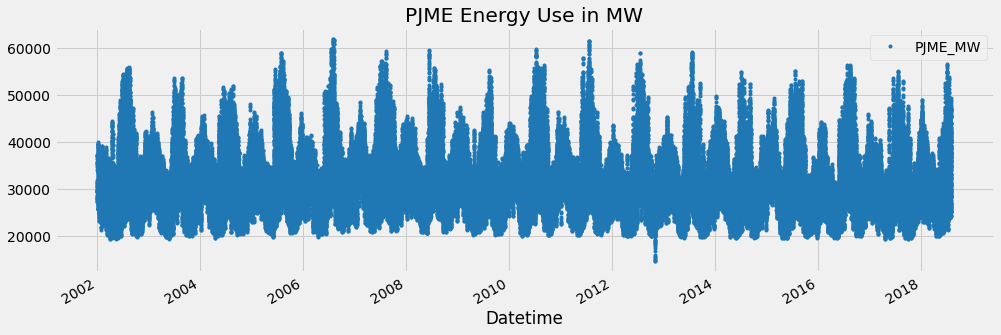

In [5]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

# Train / Test Split

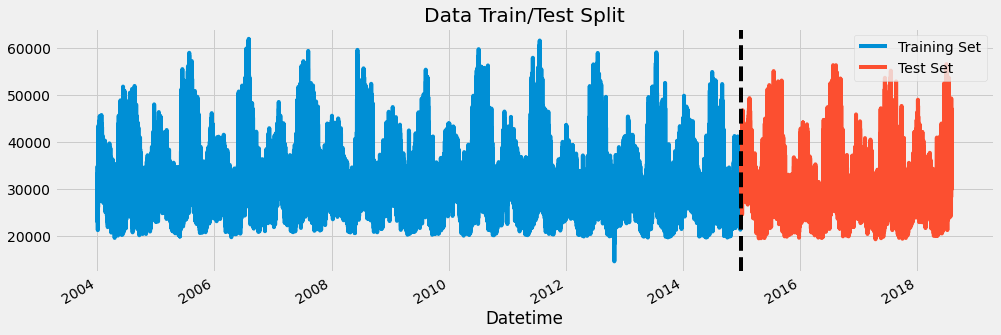

In [6]:
train = df.loc[(df.index >= '2004-01-01') & (df.index < '01-01-2015')]
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

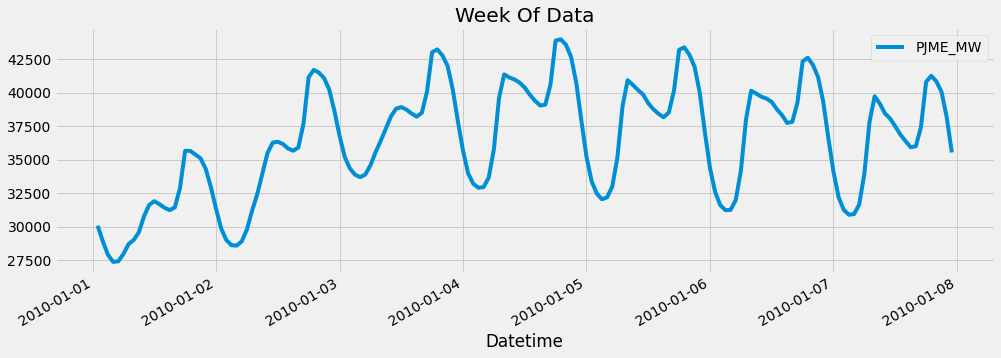

In [7]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Feature Creation

In [8]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

# Visualize our Feature / Target Relationship

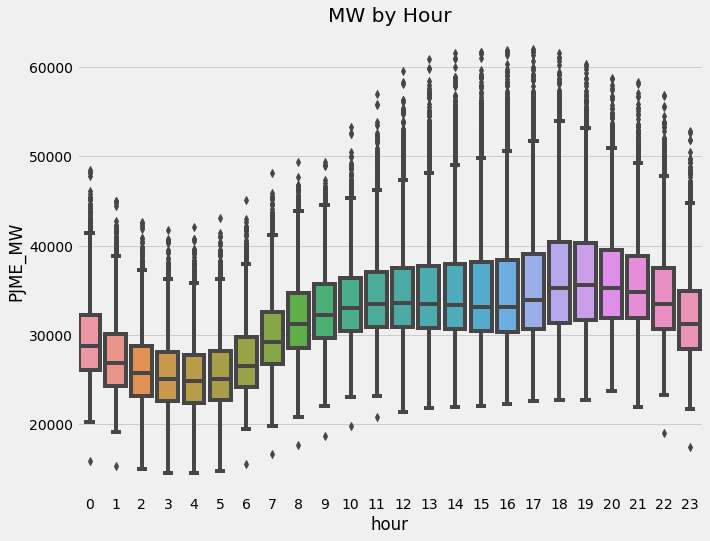

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

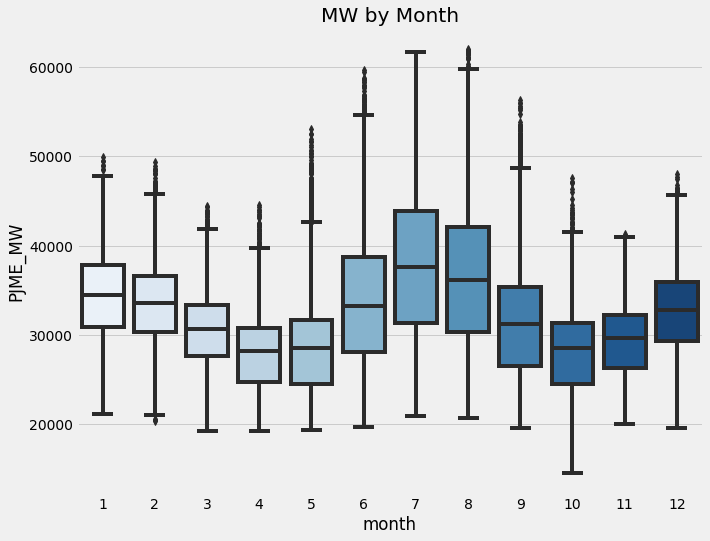

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

# Create our Model

In [11]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [12]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:17:44] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32724.01440	validation_1-rmse:31655.93222
[100]	validation_0-rmse:12627.72898	validation_1-rmse:11664.45448
[200]	validation_0-rmse:5862.09573	validation_1-rmse:5303.15838
[300]	validation_0-rmse:3949.28591	validation_1-rmse:4001.45140
[400]	validation_0-rmse:3468.80071	validation_1-rmse:3847.49048
[500]	validation_0-rmse:3305.15668	validation_1-rmse:3800.47977
[600]	validation_0-rmse:3217.40604	validation_1-rmse:3784.08694
[700]	validation_0-rmse:3163.28041	validation_1-rmse:3769.19162
[800]	validation_0-rmse:3121.38326	validation_1-rmse:3760.73552
[900]	validation_0-rmse:3084.82055	validation_1-rmse:3753.63889
[965]	validation_0-rmse:3065.19428	validation_1-rmse:3753.37113


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

# Feature Importance

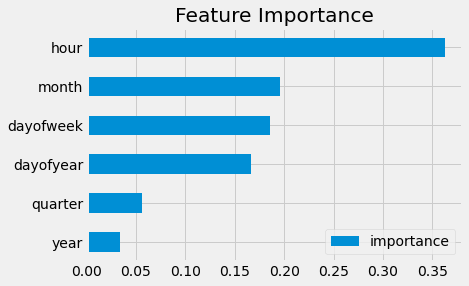

In [13]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Forecast on Test

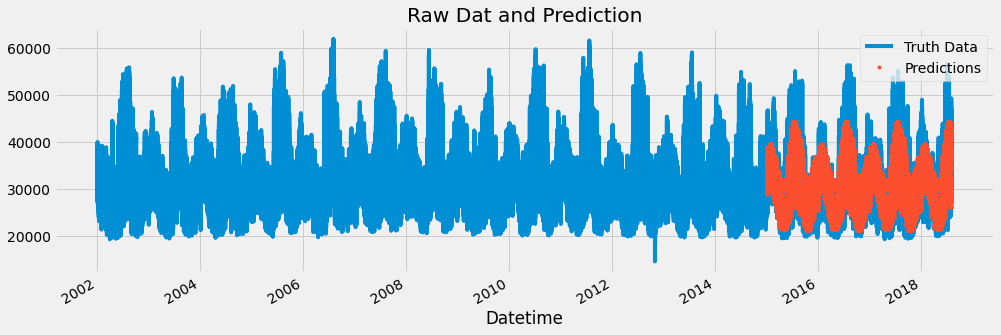

In [14]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

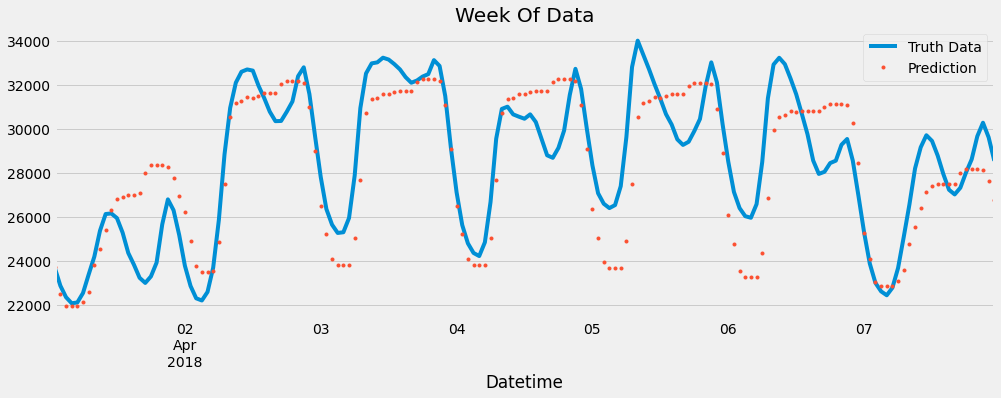

In [15]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Score (RMSE)

In [16]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3752.61


# Calculate Error
- Look at the worst and best predicted days

In [17]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2016-08-13    13185.238688
2016-08-14    13060.230632
2016-09-10    11497.742839
2016-09-09    10905.338623
2015-02-20    10893.324137
2016-08-12    10643.759684
2018-01-06    10405.326904
2015-02-21     9771.842122
2015-02-16     9719.860514
2018-01-07     9641.747640
Name: error, dtype: float64

# Next Steps
- More robust cross validation
- Add more features (weather forecast, holidays)

# The End

### Try on improvement
- Holidays data get from Public Dataset - US Holiday Dates (2004 - 2021)

In [18]:
holidays = pd.read_csv("/kaggle/input/us-holiday-dates-2004-2021/US Holiday Dates (2004-2021).csv")
holidays = holidays.sort_values(by='Date').reset_index(drop=True)
holidays

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-01-01,New Year's Day,Thursday,1,1,2004
1,2004-01-19,"Martin Luther King, Jr. Day",Monday,1,19,2004
2,2004-02-14,Valentine’s Day,Saturday,2,14,2004
3,2004-02-16,Washington's Birthday,Monday,2,16,2004
4,2004-04-11,Eastern Easter,Sunday,4,11,2004
...,...,...,...,...,...,...
337,2021-11-24,Thanksgiving Eve,Wednesday,11,24,2021
338,2021-11-25,Thanksgiving Day,Thursday,11,25,2021
339,2021-12-24,Christmas Eve,Friday,12,24,2021
340,2021-12-25,Christmas Day,Saturday,12,25,2021


In [19]:
new_df = pd.read_csv('../input/hourly-energy-consumption/PJME_hourly.csv')
new_df = new_df.set_index('Datetime')
new_df.index = pd.to_datetime(new_df.index)
new_df['Date'] = new_df.index.date
new_df['Date'] = new_df['Date'].apply(lambda x:x.strftime('%Y-%m-%d'))

# Create a list of holiday dates with proximity (1 day before and 1 day after)
holiday_dates = pd.to_datetime(holidays['Date'])
proximity_dates = holiday_dates.tolist() + (holiday_dates - pd.DateOffset(days=1)).tolist() + (holiday_dates + pd.DateOffset(days=1)).tolist()

# Create new columns to indicate proximity to holidays
new_df['is_holiday'] = new_df['Date'].isin(holidays['Date']).astype(int)
new_df['is_near_holiday'] = new_df.index.isin(proximity_dates).astype(int)

new_df = new_df.drop(columns=["Date"])
new_df

,PJME_MW,is_holiday,is_near_holiday
Datetime,,,
2002-12-31 01:00:00,26498.0,0,0
2002-12-31 02:00:00,25147.0,0,0
2002-12-31 03:00:00,24574.0,0,0
2002-12-31 04:00:00,24393.0,0,0
2002-12-31 05:00:00,24860.0,0,0
...,...,...,...
2018-01-01 20:00:00,44284.0,1,0
2018-01-01 21:00:00,43751.0,1,0
2018-01-01 22:00:00,42402.0,1,0


In [20]:
print(f"Holidays dataset with date from {min(holidays['Date'])} to {max(holidays['Date'])}")
print(f"Our dataset with date from {min(new_df.index.date).strftime('%Y-%m-%d')} to {max(new_df.index.date).strftime('%Y-%m-%d')}")

Holidays dataset with date from 2004-01-01 to 2021-12-31
Our dataset with date from 2002-01-01 to 2018-08-03


- I try to drop those records before year 2004, as just for testing improvement purpose

In [21]:
new_train = new_df.loc[(new_df.index >= '2004-01-01') & (new_df.index < '2015-01-01')]
new_test = new_df.loc[new_df.index >= '01-01-2015']

new_train = create_features(new_train)
new_test = create_features(new_test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'is_holiday', 'is_near_holiday']
TARGET = 'PJME_MW'

new_X_train = new_train[FEATURES]
new_y_train = new_train[TARGET]

new_X_test = new_test[FEATURES]
new_y_test = new_test[TARGET]

In [22]:
new_X_train

,dayofyear,hour,dayofweek,quarter,month,year,is_holiday,is_near_holiday
Datetime,,,,,,,,
2004-01-01 00:00:00,1,0,3,1,1,2004,1,1
2004-12-31 01:00:00,366,1,4,4,12,2004,1,0
2004-12-31 02:00:00,366,2,4,4,12,2004,1,0
2004-12-31 03:00:00,366,3,4,4,12,2004,1,0
2004-12-31 04:00:00,366,4,4,4,12,2004,1,0
...,...,...,...,...,...,...,...,...
2014-01-01 20:00:00,1,20,2,1,1,2014,1,0
2014-01-01 21:00:00,1,21,2,1,1,2014,1,0
2014-01-01 22:00:00,1,22,2,1,1,2014,1,0


In [23]:
new_y_train

Datetime
2004-01-01 00:00:00    28423.0
2004-12-31 01:00:00    27160.0
2004-12-31 02:00:00    25791.0
2004-12-31 03:00:00    25052.0
2004-12-31 04:00:00    24797.0
                        ...   
2014-01-01 20:00:00    36193.0
2014-01-01 21:00:00    35601.0
2014-01-01 22:00:00    34242.0
2014-01-01 23:00:00    32215.0
2014-01-02 00:00:00    30159.0
Name: PJME_MW, Length: 96411, dtype: float64

In [24]:
new_X_test

,dayofyear,hour,dayofweek,quarter,month,year,is_holiday,is_near_holiday
Datetime,,,,,,,,
2015-01-01 00:00:00,1,0,3,1,1,2015,1,1
2015-12-31 01:00:00,365,1,3,4,12,2015,1,0
2015-12-31 02:00:00,365,2,3,4,12,2015,1,0
2015-12-31 03:00:00,365,3,3,4,12,2015,1,0
2015-12-31 04:00:00,365,4,3,4,12,2015,1,0
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,1,20,0,1,1,2018,1,0
2018-01-01 21:00:00,1,21,0,1,1,2018,1,0
2018-01-01 22:00:00,1,22,0,1,1,2018,1,0


In [25]:
new_y_test

Datetime
2015-01-01 00:00:00    32802.0
2015-12-31 01:00:00    24305.0
2015-12-31 02:00:00    23156.0
2015-12-31 03:00:00    22514.0
2015-12-31 04:00:00    22330.0
                        ...   
2018-01-01 20:00:00    44284.0
2018-01-01 21:00:00    43751.0
2018-01-01 22:00:00    42402.0
2018-01-01 23:00:00    40164.0
2018-01-02 00:00:00    38608.0
Name: PJME_MW, Length: 31440, dtype: float64

In [26]:
new_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
new_reg.fit(new_X_train, new_y_train,
        eval_set=[(new_X_train, new_y_train), (new_X_test, new_y_test)],
        verbose=100)

[15:18:12] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32724.01440	validation_1-rmse:31655.93222
[100]	validation_0-rmse:12627.72898	validation_1-rmse:11664.45448
[200]	validation_0-rmse:5862.09573	validation_1-rmse:5303.15838
[300]	validation_0-rmse:3949.28591	validation_1-rmse:4001.45140
[400]	validation_0-rmse:3462.52674	validation_1-rmse:3843.39420
[500]	validation_0-rmse:3297.98780	validation_1-rmse:3811.94265
[600]	validation_0-rmse:3213.00481	validation_1-rmse:3791.57163
[700]	validation_0-rmse:3155.74237	validation_1-rmse:3778.27823
[800]	validation_0-rmse:3113.44034	validation_1-rmse:3764.58298
[900]	validation_0-rmse:3075.46407	validation_1-rmse:3754.18635
[960]	validation_0-rmse:3052.19172	validation_1-rmse:3758.07651


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [27]:
new_X_train

,dayofyear,hour,dayofweek,quarter,month,year,is_holiday,is_near_holiday
Datetime,,,,,,,,
2004-01-01 00:00:00,1,0,3,1,1,2004,1,1
2004-12-31 01:00:00,366,1,4,4,12,2004,1,0
2004-12-31 02:00:00,366,2,4,4,12,2004,1,0
2004-12-31 03:00:00,366,3,4,4,12,2004,1,0
2004-12-31 04:00:00,366,4,4,4,12,2004,1,0
...,...,...,...,...,...,...,...,...
2014-01-01 20:00:00,1,20,2,1,1,2014,1,0
2014-01-01 21:00:00,1,21,2,1,1,2014,1,0
2014-01-01 22:00:00,1,22,2,1,1,2014,1,0


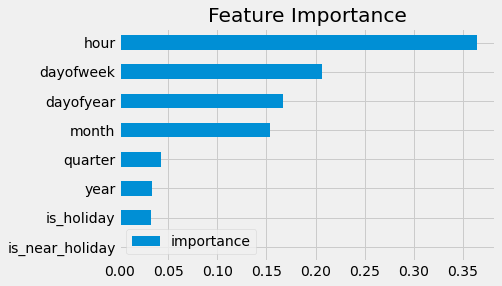

In [28]:
fi = pd.DataFrame(data=new_reg.feature_importances_,
             index=new_reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

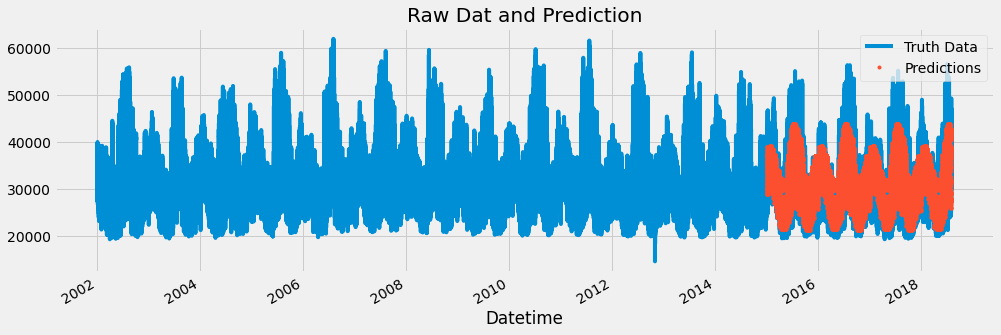

In [29]:
new_test['prediction'] = new_reg.predict(new_X_test)
new_df = new_df.merge(new_test[['prediction']], how='left', left_index=True, right_index=True)
ax = new_df[['PJME_MW']].plot(figsize=(15, 5))
new_df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

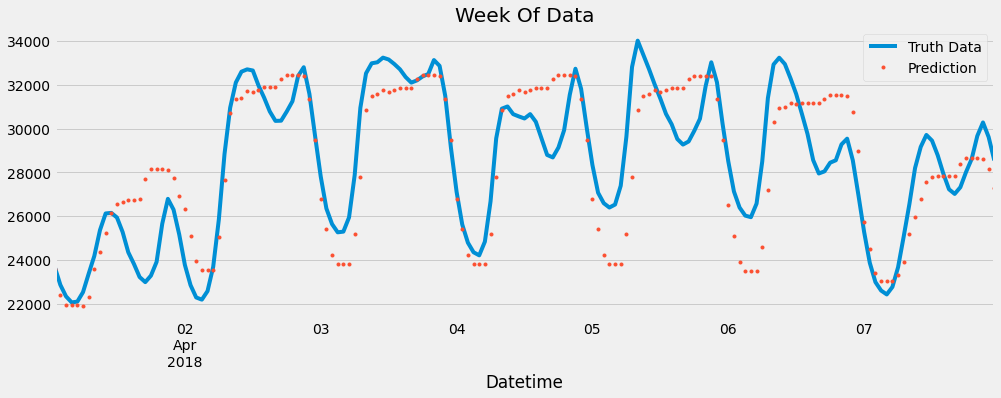

In [30]:
ax = new_df.loc[(new_df.index > '04-01-2018') & (new_df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
new_df.loc[(new_df.index > '04-01-2018') & (new_df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [31]:
score = np.sqrt(mean_squared_error(new_test['PJME_MW'], new_test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3753.37


### Test conclude <br>
#### Possible reason of unimproved:
1. Feature Engineering: <br>
The feature engineering process might require further refinement. Consider adding more holiday-related features or engineering them differently to better represent the holiday effect. As the feature i add is only straight forward features 'is_holiday' and 'is_near_holiday'.
2. Insufficient Impact: <br>
Holidays might not have a significant impact on the dataset. The influence of holidays can vary depending on the region, industry, and other factors. If the effect of holidays is minimal, the additional features may not provide substantial predictive power.

#### ENDINGS: <br>
As a beginner who still in the learning path on ML, the improvement methods that i applied maybe not the suitable ways and please do leave a comment for any suggestion. Thanks for watching ~